<a href="https://colab.research.google.com/github/Anusha-pannati/CODSOFT/blob/main/SMS_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sb
import matplotlib.pyplot as plt
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df = pd.read_csv("/content/spam.csv", encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [ ]:
df.rename(columns = {'v1': 'target', 'v2': 'SMS'}, inplace = True)

In [ ]:
le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])

In [ ]:
df

,target,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
df.isnull().sum()

target    0
SMS       0
dtype: int64

In [ ]:
df.duplicated().sum()

403

In [ ]:
df = df.drop_duplicates(keep = 'first')

In [ ]:
df.shape

(5169, 2)

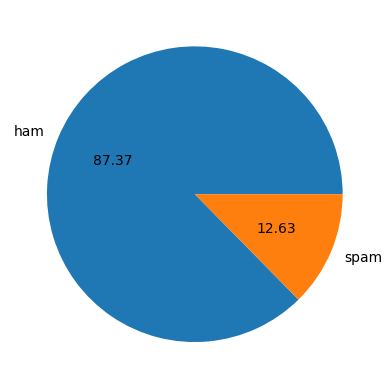

In [ ]:
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = '%0.2f')
plt.show()

In [ ]:
df['num_character'] = df['SMS'].apply(len)
df['num_words'] = df['SMS'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_setences'] = df['SMS'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
df

,target,SMS,num_character,num_words,num_setences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [ ]:
df[['num_character', 'num_words', 'num_setences']].describe()

,num_character,num_words,num_setences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['target'] == 0][['num_character', 'num_words', 'num_setences']].describe()

,num_character,num_words,num_setences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['target'] == 1][['num_character', 'num_words', 'num_setences']].describe()

,num_character,num_words,num_setences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


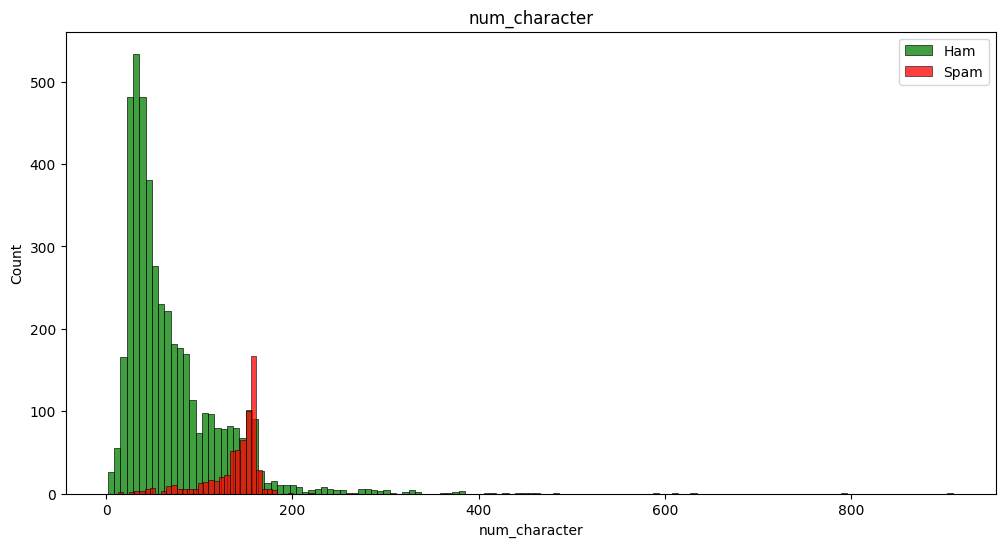

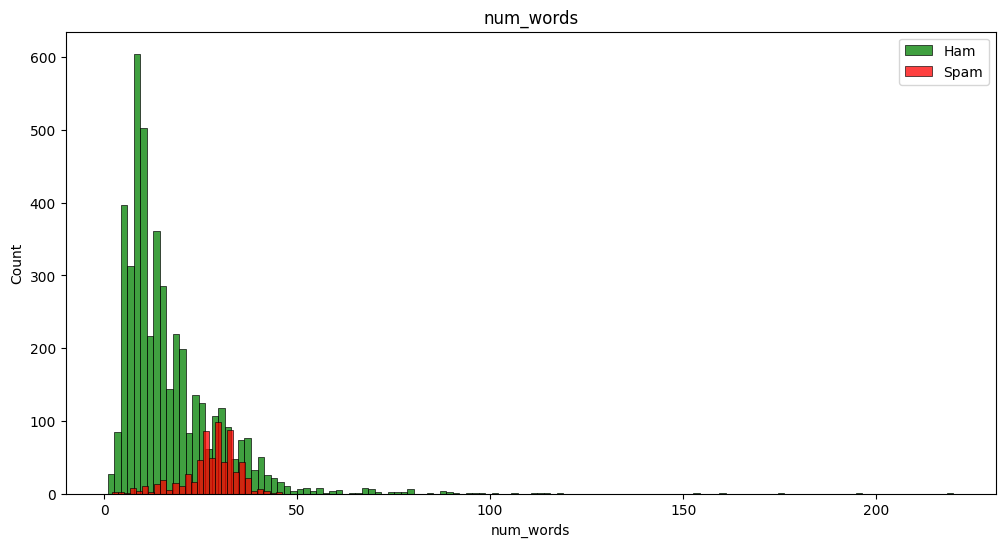

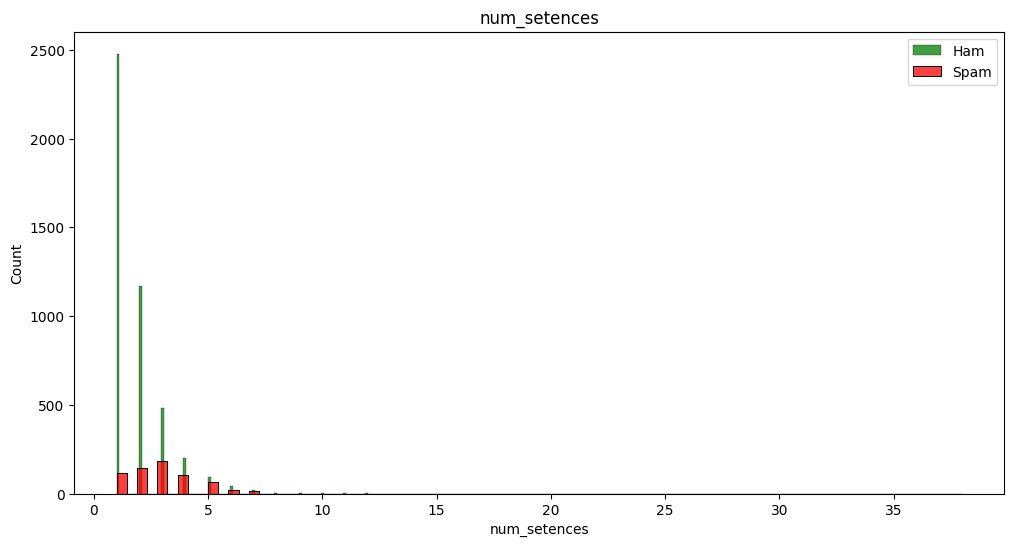

In [ ]:
columns = ['num_character', 'num_words', 'num_setences']

for column in columns:
    plt.figure(figsize = (12, 6))
    sb.histplot(df[df['target'] == 0][column], color = 'green')
    sb.histplot(df[df['target'] == 1][column], color = 'red')
    plt.legend({'Ham': 'Green', 'Spam': 'Red'})
    plt.title(column)
plt.show()

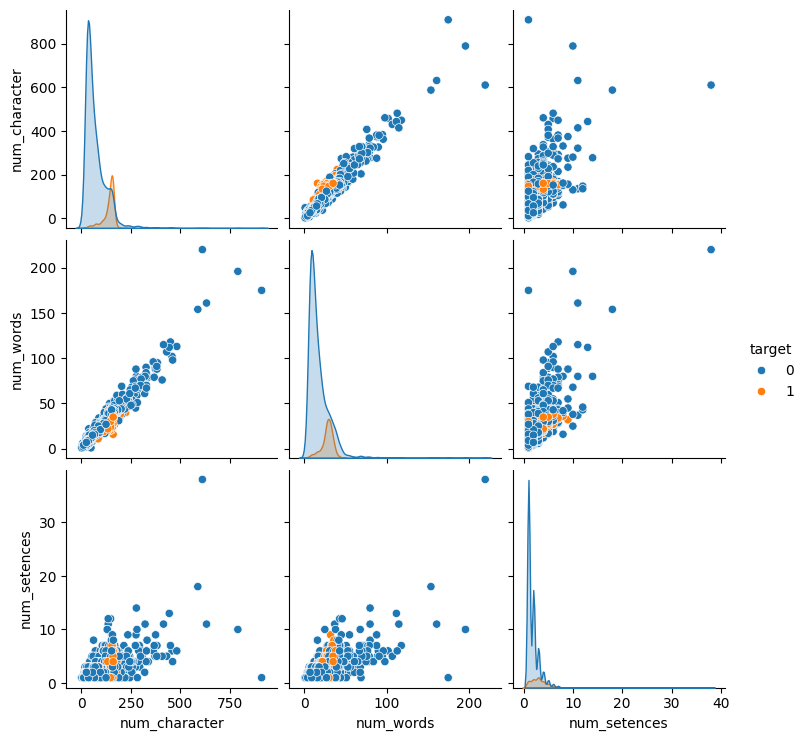

In [ ]:
sb.pairplot(df, hue = 'target')

In [ ]:
df.columns

Index(['target', 'SMS', 'num_character', 'num_words', 'num_setences'], dtype='object')

<Axes: >

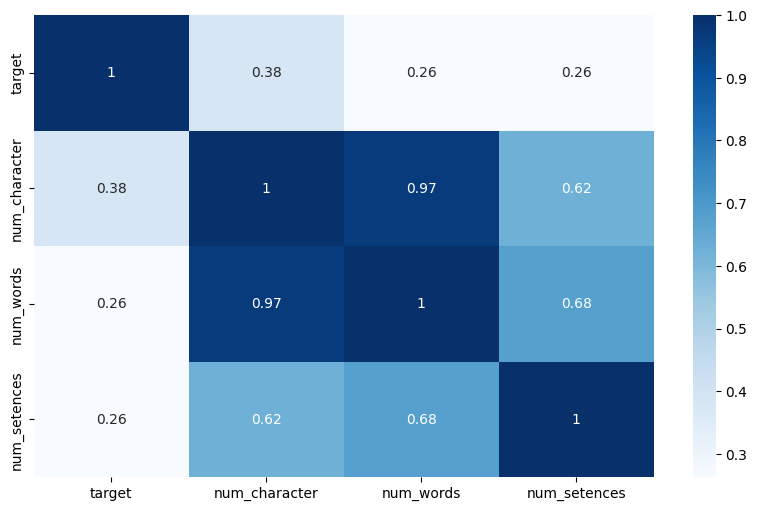

In [ ]:
correlation = df[['target', 'num_character', 'num_words', 'num_setences']]

plt.figure(figsize = (10, 6))
sb.heatmap(correlation.corr(), annot = True, cmap = 'Blues')

In [ ]:
def transform_SMS(text):


    text = text.lower()
    text = nltk.word_tokenize(text)

    list = []
    for i in text:
        if i.isalnum():
            list.append(i)

    text = list[:]
    list.clear()

    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            list.append(i)

    text = list[:]
    list.clear()
    ps = PorterStemmer()

    for i in text:
        list.append(ps.stem(i))

    return " ".join(list)

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df['transformed_text'] = df['SMS'].apply(transform_SMS)

In [ ]:
df

,target,SMS,num_character,num_words,num_setences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [ ]:
wc = WordCloud(width = 500, height = 500, background_color = 'white', min_font_size = 10)

Text(0.5, 1.0, 'Spam words')

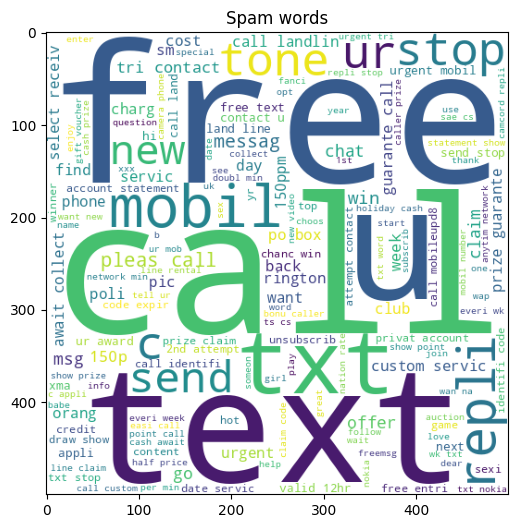

In [ ]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15, 6))
plt.imshow(spam_wc)
plt.title("Spam words")

Text(0.5, 1.0, 'Ham words')

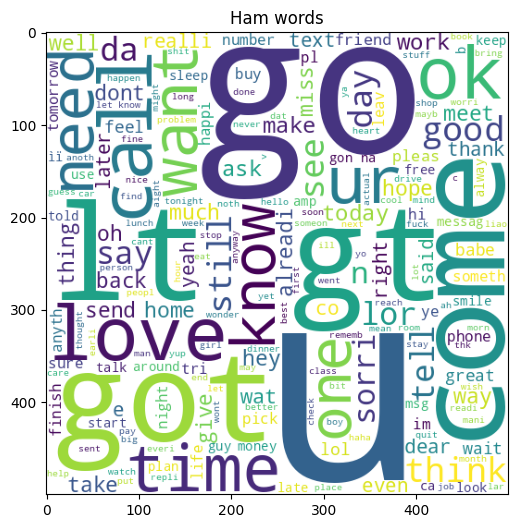

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15, 6))
plt.imshow(ham_wc)
plt.title("Ham words")

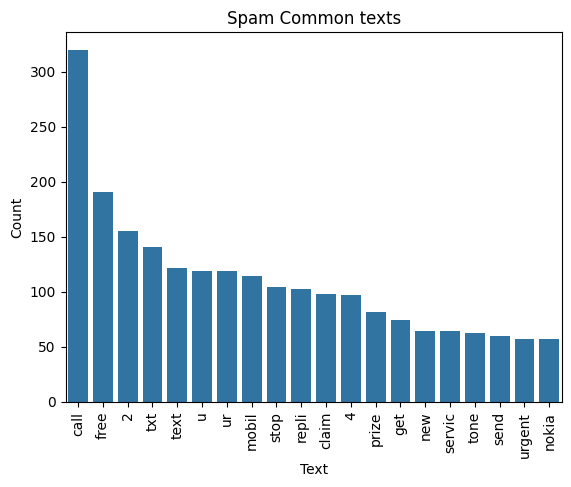

In [ ]:
spam_corpus = []
for messages in df[df['target'] == 1]['transformed_text'].tolist():
    for word in messages.split():
        spam_corpus.append(word)

commom_spam_text = pd.DataFrame(Counter(spam_corpus).most_common(20))
sb.barplot(x = commom_spam_text[0], y = commom_spam_text[1], data = commom_spam_text)
plt.xlabel("Text")
plt.ylabel("Count")
plt.title("Spam Common texts")
plt.xticks(rotation = 90)
plt.show()

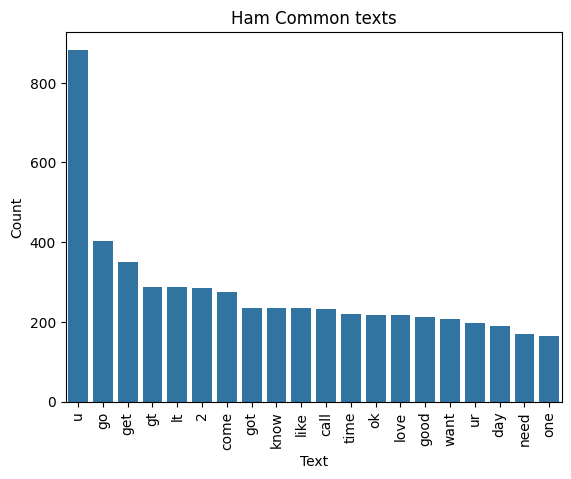

In [ ]:
ham_corpus = []
for messages in df[df['target'] == 0]['transformed_text'].tolist():
    for word in messages.split():
        ham_corpus.append(word)

commom_ham_text = pd.DataFrame(Counter(ham_corpus).most_common(20))
sb.barplot(x = commom_ham_text[0], y = commom_ham_text[1], data = commom_spam_text)
plt.xlabel("Text")
plt.ylabel("Count")
plt.title("Ham Common texts")
plt.xticks(rotation = 90)
plt.show()

In [ ]:

tfidf_3000 = TfidfVectorizer(max_features= 3000)

X = tfidf_3000.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [ ]:
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(X_train, y_train)
bernoulli_nb_pred = bernoulli_nb.predict(X_test)

print("Accuracy Score: ", accuracy_score(y_test, bernoulli_nb_pred))
print("Confusion matrix: ", confusion_matrix(y_test, bernoulli_nb_pred))
print("Precision Score: ", precision_score(y_test, bernoulli_nb_pred))

Accuracy Score:  0.9835589941972921
Confusion matrix:  [[895   1]
 [ 16 122]]
Precision Score:  0.991869918699187


In [ ]:
svc = SVC(kernel = "sigmoid", gamma = 1.0)
logistic_regression = LogisticRegression(solver = 'liblinear', penalty = 'l1')

In [ ]:
clfs = {
    'SVC': svc,
    'LR': logistic_regression,
}

In [ ]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)

    accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction)

    return accuracy, precision

In [ ]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    accuracy, precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print("For ", name)
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)

For  SVC
Accuracy:  0.9758220502901354
Precision:  0.9747899159663865
For  LR
Accuracy:  0.9584139264990329
Precision:  0.9702970297029703
